# **Read in Libraries & Data**


In [ ]:
import numpy as np 
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import os 

df = pd.read_csv('Events_report.csv') #CHANGE FILE NAME TO 'Events_report.csv'
df.head()

,ID,Date,Time,MIN,Latitude,Longitude,Event Type,Sector Name,Threat Level,Clear,Clear Date,Clear Time,Sign-off Name,Comments
0,2895493,03/01/2023,20:41:47,72,39.787124,-82.934164,Person(s) detected,Cardinal Health OH,Red,True,"('03/01/2023',)","('21:22:58',)",watchcommander@digbysecurity.com,Alerts cleared by wc 0919
1,2895541,03/01/2023,21:18:59,72,39.787124,-82.934164,Person(s) detected,Cardinal Health OH,Red,True,"('03/01/2023',)","('21:22:58',)",watchcommander@digbysecurity.com,Alerts cleared by wc 0919
2,2895575,03/01/2023,21:53:00,72,39.787124,-82.934164,Person(s) detected,Cardinal Health OH,Red,True,"('03/02/2023',)","('13:04:26',)",watchcommander@digbysecurity.com,Alerts cleared by WC9168
3,2895627,03/01/2023,22:43:30,72,39.787124,-82.934164,Person(s) detected,Cardinal Health OH,Red,True,"('03/02/2023',)","('07:44:23',)",watchcommander@digbysecurity.com,Alerts cleared by WC 9168
4,2895746,03/02/2023,0:28:18,72,39.787124,-82.934164,Person(s) detected,Cardinal Health OH,Red,True,"('03/02/2023',)","('13:04:26',)",watchcommander@digbysecurity.com,Alerts cleared by WC9168


# **Data Cleaning**

In [ ]:
df = df.drop(columns = ['ID', 'Event Type', 'Latitude', 'Longitude', 'MIN', 'Clear', 'Comments', 'Sign-off Name', 'Threat Level', 'Sector Name'])
df = df.dropna()

df['Clear Date'] = df['Clear Date'].str.replace(r"(","")
df['Clear Date'] = df['Clear Date'].str.replace(r")","")
df['Clear Date'] = df['Clear Date'].str.replace(r"'","")
df['Clear Date'] = df['Clear Date'].str.replace(r",","")

df['Clear Time'] = df['Clear Time'] .str.replace(r"(","")
df['Clear Time'] = df['Clear Time'] .str.replace(r")","")
df['Clear Time'] = df['Clear Time'] .str.replace(r"'","")
df['Clear Time']  = df['Clear Time'] .str.replace(r",","")

def datetime(df): 
  
  #Functionality: Converts 4 date & time columns to two DateTime columns 
  #Asssumes: 4 Columns, 2 clean dates, 2 clean times 

  df['Date Time' ] = df['Date'] + " " +  df['Time']
  df['Clear Date Time' ] = df['Clear Date'] + " " +  df['Clear Time']
  
  df['Date Time'] = pd.to_datetime(df['Date Time'], errors='coerce')
  df['Clear Date Time'] = pd.to_datetime(df['Clear Date Time'], errors='coerce')

datetime(df)


def time_passed(df):
  #Functionality: Get Time Difference between Two DF Columns
  #Assumes: Two Datetime formated Columns (see datetime)

  time1 = 'Date Time'
  time2 = 'Clear Date Time'

  df['m'] = (df[time2] - df[time1]).dt.total_seconds() / 60
  df['s'] = (df[time2] - df[time1]).dt.total_seconds() 
  df['h'] = (df[time2] - df[time1]).dt.total_seconds() / 60 /60
  df['d'] = (df[time2] - df[time1]).dt.total_seconds() / 60 / 60 / 24
  df['full_d'] = (df[time2] - df[time1]).dt.days

time_passed(df)

# **Response Time by Minute**

Number of Alerts Cleared...
  Within 5 Minutes: 34 (16.43%)
  Within 10 Minutes: 14 (6.76%)
  Within 15 Minutes: 17 (8.21%)
  Within 30 Minutes: 27 (13.04%)
  Over 30 Minutes: 115 (55.56%)
 
Total Number of Cleared Alerts: 207
 


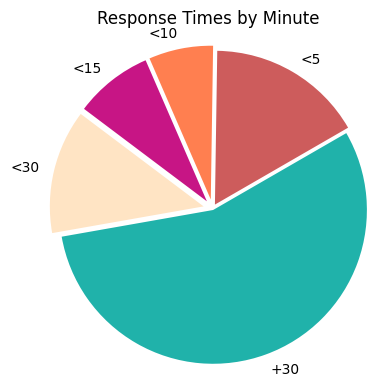

In [ ]:
#RETRIEVING
within_5 = df.loc[df['m'] <= 5]
within_10 = df.loc[(df['m'] <= 10) & (df['m'] > 5)] 
within_15 = df.loc[(df['m'] <= 15) & (df['m'] > 10)]
within_30 = df.loc[(df['m'] <= 30) & (df['m'] > 15)]
over_30 = df.loc[(df['m'] > 30)]

all_alerts = [within_5,within_10,within_15,within_30,over_30]
Number_Cleared = []
Percentage = []

for i in all_alerts:
  Number_Cleared.append(len(i.index))

for i in Number_Cleared:
  Percentage.append(100*(i/sum(Number_Cleared)))

#TABLE

print("Number of Alerts Cleared...")
print("  Within 5 Minutes: {} ({:.2f}%)".format(Number_Cleared[0], Percentage[0]))
print("  Within 10 Minutes: {} ({:.2f}%)".format(Number_Cleared[1], Percentage[1]))
print("  Within 15 Minutes: {} ({:.2f}%)".format(Number_Cleared[2], Percentage[2]))
print("  Within 30 Minutes: {} ({:.2f}%)".format(Number_Cleared[3], Percentage[3]))
print("  Over 30 Minutes: {} ({:.2f}%)".format(Number_Cleared[4], Percentage[4]))
print(" ")
print("Total Number of Cleared Alerts: {}".format(sum(Number_Cleared)))
print(" ")

#PLOT

labels = '<5', '<10', '<15','<30', '+30'
colors=['indianred', 'coral','mediumvioletred','bisque','lightseagreen']

plt.pie(Percentage, labels=labels, colors=colors,
        startangle=30, explode = (0.03, 0.06, 0.06,0.06,0.01),)

plt.axis('equal') 
plt.title("Response Times by Minute")
fig = plt.gcf()
fig.set_size_inches(4.5,4.5)
plt.show()


# **Averages by Category**




In [ ]:
total_mean = df['m'].mean()
total_mean
within_5_mean = within_5['m'].mean()
within_5_mean
within_10_mean = within_10['m'].mean()
within_10_mean
within_15_mean = within_15['m'].mean()
within_15_mean
within_30_mean = within_30['m'].mean()
within_30_mean
over_30_mean = over_30['m'].mean()
over_30_mean
print("Average Response Time Within 5 Minutes: {:.2f}".format(within_5_mean))
print("Average Response Time Within 10 Minutes: {:.2f}".format(within_10_mean))
print("Average Response Time Within 15 Minutes: {:.2f}".format(within_15_mean))
print("Average Response Time Within 30 Minutes: {:.2f}".format(within_30_mean))
print("Average Response Time Over 30 Minutes: {:.2f}".format(over_30_mean))
print()
print("Total Average Response Time: {:.2f}".format(total_mean))

Average Response Time Within 5 Minutes: 2.09
Average Response Time Within 10 Minutes: 7.43
Average Response Time Within 15 Minutes: 12.76
Average Response Time Within 30 Minutes: 21.32
Average Response Time Over 30 Minutes: 122.46

Total Average Response Time: 72.71


# **Monthly Averages**

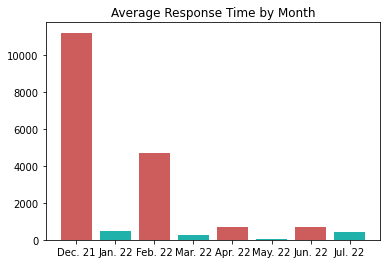

'\n12.2021 - 11229.31\n1.2022 - 452.71\n2.2022 - 4714.32\n3.2022 - 267.645\n4.2022 - 678.59\n5.2022 - 38.495\n6.2022 - 710.52\n7.2022 - 432.43 '

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
# create a dataset
height = [11229.31, 452.71, 4714.32, 267.645, 678.59,38.495,710.52,432.43]
bars = ('Dec. 21', 'Jan. 22', 'Feb. 22', 'Mar. 22', 'Apr. 22', 'May. 22', 'Jun. 22', 'Jul. 22')
x_pos = np.arange(8)

# Create bars with different colors
plt.bar(x_pos, height, color=['indianred', 'lightseagreen'])

# Create names on the x-axis
plt.xticks(x_pos, bars)
plt.title("Average Response Time by Month")
# Show graph
plt.show()

"""
12.2021 - 11229.31
1.2022 - 452.71
2.2022 - 4714.32
3.2022 - 267.645
4.2022 - 678.59
5.2022 - 38.495
6.2022 - 710.52
7.2022 - 432.43 """